## Plot the evolution of the geometric emittance for one selected study

In [1]:
import os
import sys
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd
import pickle

### Test that you have acces to the /afs directory where your data are stored
If permision denied
- $USERNAME@CERN.CH 
- aklog

In [2]:
ls /afs/cern.ch/work/n/natriant/private

my_tracking_model_htcondor/  simulation_data_2018/  sixdesk/  workspaces/


In [3]:
params = {'legend.fontsize': 25,
          'figure.figsize': (8.5, 6.5),
          'axes.labelsize': 25,
          'axes.titlesize': 25,
          'xtick.labelsize': 25,
          'ytick.labelsize': 25,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Functions for calculating the geometric emittance|

In [10]:
# #--- <x^2> ---
def mean2(numb):
    return np.nanmean( (numb - np.nanmean(numb))**2 )

# #--- <xx'> ---
def mean3(numbx , numbpx):
    return np.nanmean( (numbx - np.nanmean(numbx)) * (numbpx - np.nanmean(numbpx)) )

# #--- sqrt(<x^2> * <px^2> - <xx'>^2) --- compute statistical emittance
def cmp_emit(position, angle):
    return  np.sqrt(mean2(position) * mean2(angle) - mean3(position,angle)**2) # geometrical emittance

### Give the parameters of the study

In [5]:
beta_x = 115.75
beta_y = 115.75
particles = 15000
turns = 1000

### Import the data of the study

In [35]:
my_afs_path = '/afs/cern.ch/work/n/natriant/private/my_tracking_model_htcondor/tracking_data/'
file_name = 'Qx62.775_Qy62.775_ksi0.005_g0.200_delta0.100_betax115.75_betay115.75_particles15000_turns1000'
df = pd.read_pickle(my_afs_path+ file_name + '.pkl')

In [36]:
e_x = [] # list for the values of geometric emittance over turns
e_y = []
for turn in range(turns):
    e_x.append(cmp_emit(df.at[turn,'x']/sqrt(beta_x), df.at[turn,'px']*sqrt(beta_x) ))
    e_y.append(cmp_emit(df.at[turn,'y']/sqrt(beta_y), df.at[turn,'py']*sqrt(beta_y) ))

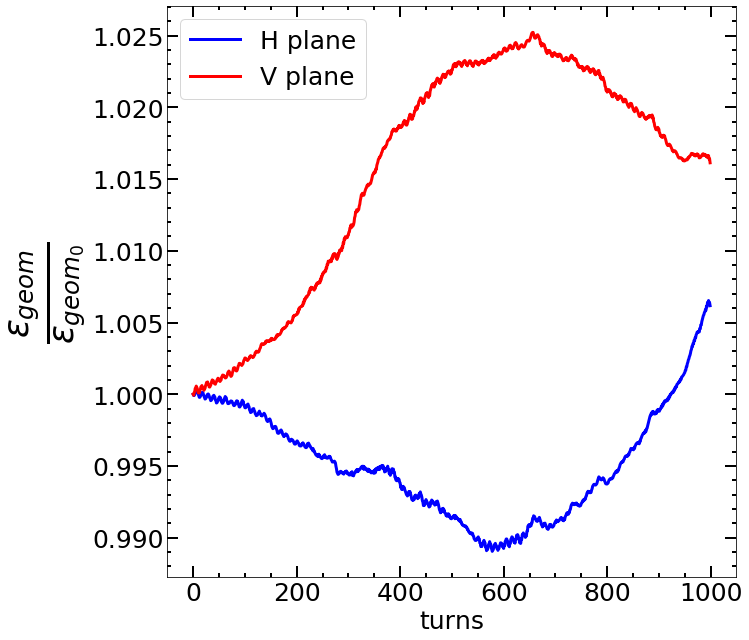

In [37]:
fig, ax = plt.subplots(1,1,figsize=(10.5,9))

ax.plot(e_x/e_x[0], c = 'b', label='H plane', linewidth=3)
ax.plot(e_y/e_y[0], c='r', label='V plane', linewidth=3)

ax.set_xlabel('turns')
ax.set_ylabel(r'$\frac{\epsilon_{geom}}{\epsilon_{geom_0}} $', fontsize = 50)

#ax.set_ylim(0, 40)

# Set the ticks in both sides of the axes
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
# Display minor ticks on the axis
ax.minorticks_on() 


# Set the appearance of the ticks
ax.tick_params(which='both',direction='in', width=2)
ax.tick_params(which='major',direction='in', length=11)
ax.tick_params(which='minor',direction='in', length=4)



# Make axis equal. Note that the size of the figure affects this
ax.set_aspect(aspect='auto')
plt.legend()

#plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('./figures/emittance_evolution_{}.png'.format(file_name))

### Plot loses
A particle is considered lost if its coordinates are NaN. This is because the don't meet the aperture condition.

In [51]:
losses_x = []
losses_y = []
for turn in range(turns):
    losses_x.append(np.isnan(df['x'][turn]).sum())
    losses_y.append(np.isnan(df['y'][turn]).sum())

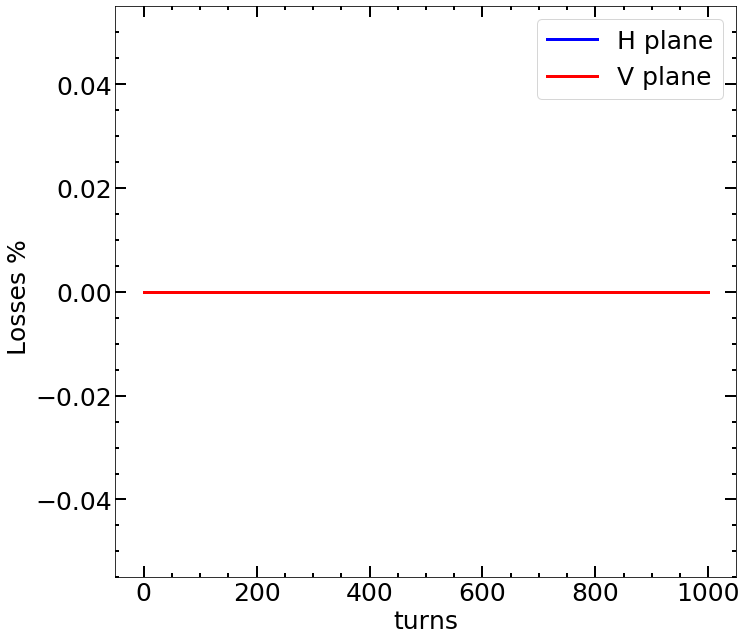

In [53]:
fig, ax = plt.subplots(1,1,figsize=(10.5,9))


losses_x_percentege = np.array(losses_x)*100./particles
losses_y_percentege = np.array(losses_y)*100./particles
ax.plot(losses_x_percentege, c = 'b', label='H plane', linewidth=3)
ax.plot(losses_y_percentege, c='r', label='V plane', linewidth=3)

ax.set_xlabel('turns')
ax.set_ylabel('Losses % ')

#ax.set_ylim(0, 40)

# Set the ticks in both sides of the axes
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
# Display minor ticks on the axis
ax.minorticks_on() 


# Set the appearance of the ticks
ax.tick_params(which='both',direction='in', width=2)
ax.tick_params(which='major',direction='in', length=11)
ax.tick_params(which='minor',direction='in', length=4)



# Make axis equal. Note that the size of the figure affects this
ax.set_aspect(aspect='auto')
plt.legend()

#plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig('./figures/losses_{}.png'.format(file_name))